## Mood classfication using CNN (HAPPY / SAD)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [2]:
img = image.load_img(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Training\Happy\1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg')

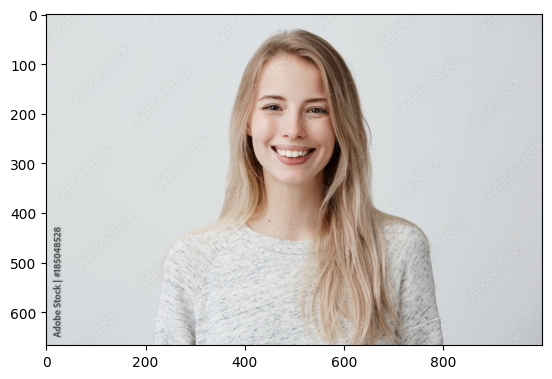

In [3]:
plt.imshow(img)

In [4]:
i1 = cv2.imread(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Training\Happy\1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[222, 221, 217],
        [222, 221, 217],
        [222, 221, 217],
        ...,
        [208, 205, 201],
        [208, 205, 201],
        [208, 205, 201]],

       [[222, 221, 217],
        [222, 221, 217],
        [222, 221, 217],
        ...,
        [208, 205, 201],
        [208, 205, 201],
        [208, 205, 201]],

       [[222, 221, 217],
        [222, 221, 217],
        [222, 221, 217],
        ...,
        [208, 205, 201],
        [208, 205, 201],
        [208, 205, 201]],

       ...,

       [[214, 211, 207],
        [214, 211, 207],
        [214, 211, 206],
        ...,
        [196, 192, 191],
        [196, 192, 191],
        [195, 192, 188]],

       [[214, 211, 207],
        [214, 211, 207],
        [214, 211, 206],
        ...,
        [196, 192, 191],
        [196, 192, 191],
        [195, 192, 188]],

       [[214, 211, 207],
        [214, 211, 207],
        [214, 211, 206],
        ...,
        [196, 192, 191],
        [195, 191, 190],
        [195, 192, 188]]

In [5]:
i1.shape
# shape of your image height, weight, rgb

(667, 1000, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [7]:
train_dataset = train.flow_from_directory(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 164 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

C:\Users\umari\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [12]:
model_fit = model.fit(train_dataset,
                     
                     epochs = 10,
                     validation_data = validataion_dataset)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - accuracy: 0.5549 - loss: 2.2860 - val_accuracy: 0.3333 - val_loss: 0.6932
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.6159 - loss: 0.7280 - val_accuracy: 0.8889 - val_loss: 0.6685
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.6585 - loss: 0.6863 - val_accuracy: 0.6667 - val_loss: 0.7045
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.7805 - loss: 0.4960 - val_accuracy: 0.8889 - val_loss: 0.6613
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.8415 - loss: 0.3530 - val_accuracy: 0.4444 - val_loss: 1.0950
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.9329 - loss: 0.2155 - val_accuracy: 0.7778 - val_loss: 0.5795
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.9634 - loss: 0.1586 - val_accuracy: 0.6667 - val_loss: 1.1339
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.9634 - loss: 0.1511 - val_accu

In [13]:
dir_path = r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

-human-emotions-children-concept-beautiful-excited-optimistic-blue-236590722.jpg
-man-sad-face-looking-depressed-unhappy-close-up-portrait-handsome-139799742.jpg
-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg
094168c45d805d5ccbfda755907db503.jpg
1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg
1000_F_190680368_2qzxZ1xbu0wQ1uIMUBTrOPmtWcbVY8DR.jpg
1000_F_206824821_mW4moy3WAgM9PGvAUIlf0Y949Yl0QeT2.jpg
1000_F_206825274_frM1i88fNtBhWJ8ria4R9pf5kviFOAXt.jpg
1000_F_206825373_PfhE4TyHbpUXggBKdTLZYn0HcuRCP9rf.jpg
1000_F_246149544_RZIU2J7fQKl9JVWZBeSvJHUCRtdjTqAl.jpg
1000_F_250183535_2GQkyWdHf2295bWWiMfxLf7BTiYd2CRu.jpg
1000_F_254262588_wbdwGWgnETRzXZo49JBRLfkjnUybShBE.jpg
1000_F_254492492_Wx1D8iuzMTQrLWsGuV3CczX2teZau4XG.jpg
1000_F_254493070_YxfkliEDM4Ifh7igWig3lkxTtSVQOBxm.jpg
1000_F_267995900_qg8jfTCHvCijDkXC5HOlPBK0pZ0i0dlh.jpg
1000_F_268945553_eUTxWXHGlY945AFW0cY7rU4TCgJjIyWn.jpg
1000_F_303704831_0lfmbfqH4z2wfPDUQZxMsRyA6Rw2Al61.jpg
1000_F_605813544_W

In [14]:
import os
from keras.preprocessing import image
from matplotlib import pyplot as plt

dir_path = r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Testing'

valid_ext = ('.jpg', '.jpeg', '.png', '.bmp')

for filename in os.listdir(dir_path):
    if not filename.lower().endswith(valid_ext):
        print("Skipping:", filename)
        continue

    img_path = os.path.join(dir_path, filename)

    try:
        img = image.load_img(img_path, target_size=(200, 200))
        # plt.imshow(img)
        # plt.title(filename)
        # plt.axis('off')
        # plt.show()
    except Exception as e:
        print("Error loading:", filename, e)


Error loading: Happy-21.jpg cannot identify image file <_io.BytesIO object at 0x000001C5C5C272E0>


In [15]:
#dir_path = r'C:\Users\dives\OneDrive\Documents\dataset img\testing'
#for i in os.listdir(dir_path ):
 #   img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
  #  plt.imshow(img)
   # plt.show()
        
   # x= image.img_to_array(img)
    #x=np.expand_dims(x,axis = 0)
    #images = np.vstack([x])
    
    #val = model.predict(images)
    #if val == 0:
     #   print( ' i am not happy')
    #else:
     #   print('i am happy')
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

dir_path = r'C:\Users\umari\OneDrive\Desktop\FSDS Projects\Mood Class Classification\Testing'

valid_ext = ('.jpg', '.jpeg', '.png', '.bmp')

for file_name in os.listdir(dir_path):

    # Skip non-image files
    if not file_name.lower().endswith(valid_ext):
        print("Skipping:", file_name)
        continue

    img_path = os.path.join(dir_path, file_name)

    try:
        # Load and resize image
        img = image.load_img(img_path, target_size=(200, 200))
    except Exception as e:
        print("Error loading:", file_name, "|", e)
        continue

    # Display image
    # plt.imshow(img)
    # plt.title(file_name)
    # plt.axis('off')
    # plt.show()

    # Convert image to array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    # Predict
    val = model.predict(x)

    # Handle output
    if val[0][0] < 0.5:
        print(file_name, "→ I am happy 😄")
    else:
        print(file_name, "→ I am not happy 😢")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
-human-emotions-children-concept-beautiful-excited-optimistic-blue-236590722.jpg → I am happy 😄
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
-man-sad-face-looking-depressed-unhappy-close-up-portrait-handsome-139799742.jpg → I am not happy 😢
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg → I am happy 😄
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
094168c45d805d5ccbfda755907db503.jpg → I am not happy 😢
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg → I am happy 😄
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1000_F_190680368_2qzxZ1xbu0wQ1uIMUBTrOPmtWcbVY8DR.jpg → I am not happy 😢
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1000_F_206824821_mW4moy3WAgM9PGvAUIlf0Y949Yl0QeT2.jpg → I am not happy 😢
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1000_F_206825274_frM1i88fNtBhWJ8ria4R9pf5kviFOAXt.jpg → I am not happy 😢
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1000_F_206825373_PfhE

In [16]:
!python --version

Python 3.12.3


In [17]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    img=image.resize((200,200))
    x=np.array(img)
    x=np.expand_dims(x,axis=0)
    x=x/200.0
    
    val=model.predict(x)[0][0]
    if val<0.5:
        return "I am happy 😄"
    else:
        return "I am not happy 😢"

c:\Users\umari\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
